# Homework 5

Due: Wednesday, 28th May 2025

## Exercise 1: Correlations
Let's recreate the plot from the lecture. Assume two neurons that are tuned to a directed stimulus $s\in[0, 2\pi]$. The neurons are Poisson neurons with rates (in Hz)
\begin{align}
r_1(s) &= \exp\left(\sin(s - \frac{\pi}{4})\right) \\
r_2(s) &= \exp\left(\sin\left(s - \frac{\pi}{2}\right)\right)
\end{align}



a) Draw 10,000 stimuli uniformly. For both neurons, draw spike counts for a measurement duration of 25 seconds and save the firing rates. Discretize the range for the stimuli into 20 bins and compute the tuning curves (average firing rate). Plot the tuning curves for both neurons into separate subplots. Additionally, pick one bin and plot all firing rates for that bin as a scatter plot (for each neuron, plot into the same corresponding subplot). (3 points)


In [35]:
# 10,000 stimuls values 
import numpy as np

# Number of stimuli
num_stimuli = 10000

# Uniformly distributed in the range [0, 2*\pi]
s =  np.random.uniform(0, 2*np.pi, num_stimuli)
assert len(s) == 10000, "The number of stimuli should be 10,000"

firing_rate_neuron_1 = np.exp( np.sin(s - np.pi/4)) # in Hz
firing_rate_neuron_2 = np.exp( np.sin(s - np.pi/2)) # in Hz

measured_duration = 25 # in seconds

poisson_spikes_neuron_1 = np.random.poisson(firing_rate_neuron_1 * measured_duration)
poisson_spikes_neuron_2 = np.random.poisson(firing_rate_neuron_2 * measured_duration)

assert len(poisson_spikes_neuron_1) == 10000, "The number of spikes for neuron 1 should match the number of stimuli"
assert len(poisson_spikes_neuron_2) == 10000, "The number of spikes for neuron 2 should match the number of stimuli"

# Calculate the observed firing rate for this trial by dividing the simulated spike count by the 25-second duration. Save this observed rate.
observed_firing_rate_neuron_1 = poisson_spikes_neuron_1 / measured_duration
observed_firing_rate_neuron_2 = poisson_spikes_neuron_2 / measured_duration

assert len(observed_firing_rate_neuron_1) == 10000, "The observed firing rate for neuron 1 should match the number of stimuli"
assert len(observed_firing_rate_neuron_2) == 10000, "The observed firing rate for neuron 2 should match the number of stimuli"

stimulus_bin_size = 20
stimulus_bins = np.linspace(0, 2 * np.pi, stimulus_bin_size)  # 20 bins for the stimulus values
print(f"Stimulus bins: {stimulus_bins}")

mean_firing_rate_neuron_1 = np.zeros(stimulus_bin_size - 1)
mean_firing_rate_neuron_2 = np.zeros(stimulus_bin_size - 1)

for i in range(stimulus_bin_size - 1):
    bin_mask = (s >= stimulus_bins[i]) & (s < stimulus_bins[i + 1])
    if np.any(bin_mask):
        mean_firing_rate_neuron_1[i] = np.mean(observed_firing_rate_neuron_1[bin_mask])
        mean_firing_rate_neuron_2[i] = np.mean(observed_firing_rate_neuron_2[bin_mask])
        print(f"Bin {i}: [{stimulus_bins[i]}, {stimulus_bins[i + 1]}) -> Neuron 1: {mean_firing_rate_neuron_1[i]:.2f} Hz, Neuron 2: {mean_firing_rate_neuron_2[i]:.2f} Hz")
    else:
        print(f"Bin {i}: [{stimulus_bins[i]}, {stimulus_bins[i + 1]}) -> No spikes recorded")
# Save the results to a file
np.savez('stimulus_firing_rates.npz', 
         stimulus_bins=stimulus_bins, 
         firing_rate_neuron_1=observed_firing_rate_neuron_1, 
         firing_rate_neuron_2=observed_firing_rate_neuron_2,
         mean_firing_rate_neuron_1=mean_firing_rate_neuron_1,
         mean_firing_rate_neuron_2=mean_firing_rate_neuron_2)
print("Stimulus firing rates saved to 'stimulus_firing_rates.npz'")
# Load the saved data to verify
loaded_data = np.load('stimulus_firing_rates.npz')
print("Loaded stimulus bins:", loaded_data['stimulus_bins'])
print("Loaded firing rates for neuron 1:", loaded_data['firing_rate_neuron_1'])
print("Loaded firing rates for neuron 2:", loaded_data['firing_rate_neuron_2'])
# Check the shape of the loaded data
print("Shape of loaded firing rates for neuron 1:", loaded_data['firing_rate_neuron_1'].shape)
print("Shape of loaded firing rates for neuron 2:", loaded_data['firing_rate_neuron_2'].shape)
# Check the shape of the stimulus bins
print("Shape of loaded stimulus bins:", loaded_data['stimulus_bins'].shape)
# Check if the number of bins matches the expected size
assert loaded_data['stimulus_bins'].shape[0] == stimulus_bin_size, "The number of stimulus bins should match the expected size"
# Check if the firing rates match the expected number of stimuli
assert loaded_data['firing_rate_neuron_1'].shape[0] == num_stimuli, "The number of firing rates for neuron 1 should match the number of stimuli"
assert loaded_data['firing_rate_neuron_2'].shape[0] == num_stimuli, "The number of firing rates for neuron 2 should match the number of stimuli"



print("Mean firing rates for neuron 1:", loaded_data['mean_firing_rate_neuron_1'].shape)
print("Mean firing rates for neuron 2:", loaded_data['mean_firing_rate_neuron_2'].shape)
assert loaded_data['stimulus_bins'].shape[0] == stimulus_bin_size, "The number of stimulus bins should match the expected size"
assert loaded_data['mean_firing_rate_neuron_1'].shape[0] == stimulus_bin_size - 1, "The mean firing rate for neuron 1 should match the number of bins - 1"
assert loaded_data['mean_firing_rate_neuron_2'].shape[0] == stimulus_bin_size - 1, "The mean firing rate for neuron 2 should match the number of bins - 1"



Stimulus bins: [0.         0.33069396 0.66138793 0.99208189 1.32277585 1.65346982
 1.98416378 2.31485774 2.64555171 2.97624567 3.30693964 3.6376336
 3.96832756 4.29902153 4.62971549 4.96040945 5.29110342 5.62179738
 5.95249134 6.28318531]
Bin 0: [0.0, 0.3306939635357677) -> Neuron 1: 0.55 Hz, Neuron 2: 0.37 Hz
Bin 1: [0.3306939635357677, 0.6613879270715354) -> Neuron 1: 0.74 Hz, Neuron 2: 0.41 Hz
Bin 2: [0.6613879270715354, 0.992081890607303) -> Neuron 1: 1.05 Hz, Neuron 2: 0.52 Hz
Bin 3: [0.992081890607303, 1.3227758541430708) -> Neuron 1: 1.44 Hz, Neuron 2: 0.67 Hz
Bin 4: [1.3227758541430708, 1.6534698176788385) -> Neuron 1: 1.90 Hz, Neuron 2: 0.93 Hz
Bin 5: [1.6534698176788385, 1.984163781214606) -> Neuron 1: 2.35 Hz, Neuron 2: 1.29 Hz
Bin 6: [1.984163781214606, 2.3148577447503738) -> Neuron 1: 2.64 Hz, Neuron 2: 1.72 Hz
Bin 7: [2.3148577447503738, 2.6455517082861415) -> Neuron 1: 2.68 Hz, Neuron 2: 2.20 Hz
Bin 8: [2.6455517082861415, 2.9762456718219092) -> Neuron 1: 2.50 Hz, Neuron

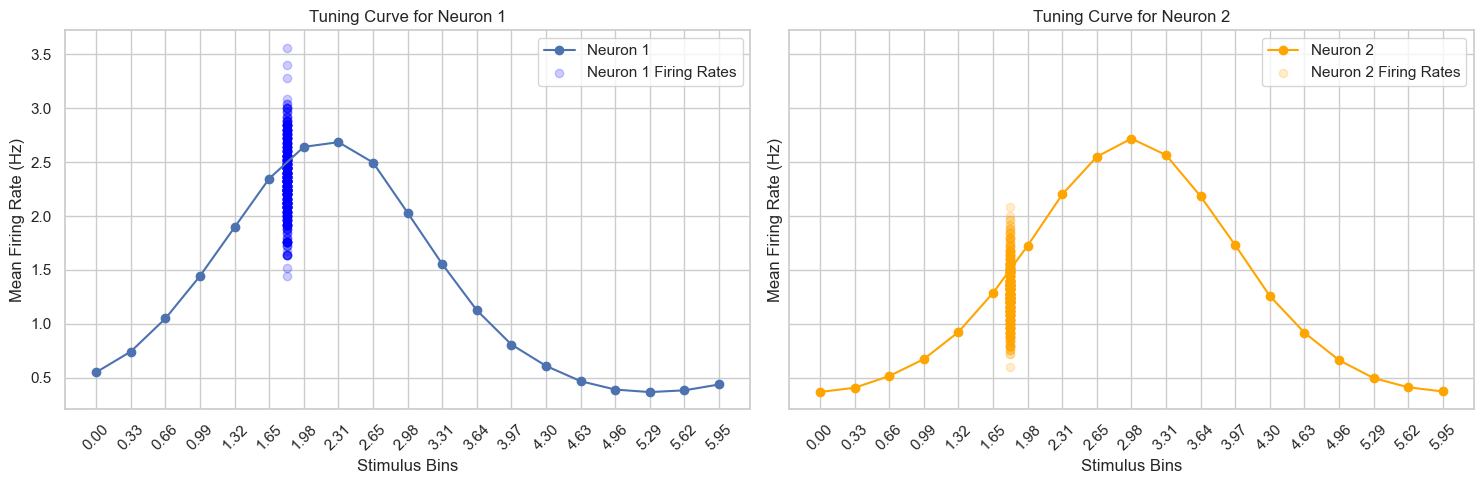

In [79]:
# Plot the tuning curves for both neurons into separate subplots. 

# Tuning Curve Plot 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')


# Plot the mean firing rates for both neurons across the stimulus bins
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True) # Use plural subplots

# Plot the tuning curves for both neurons
# using the mean firing rates calculated above.
# Ensure the stimulus bins are used correctly for the x-axis
# and the mean firing rates for the y-axis.
# Ensure the x-axis is labeled with the stimulus bins and the y-axis with firing rates.
# Ensure the plot has a title, x-label, y-label, and a legend.
# Ensure the plot is saved as 'tuning_curve.png' and displayed.     

axes[0].plot(loaded_data['stimulus_bins'][:-1],
          loaded_data['mean_firing_rate_neuron_1'], 
          label='Neuron 1', marker='o')
axes[0].set_title('Tuning Curve for Neuron 1')
axes[0].set_ylabel('Mean Firing Rate (Hz)')
axes[0].legend()
axes[0].set_xlabel('Stimulus Bins')
axes[1].set_xlabel('Stimulus Bins')
axes[1].set_ylabel('Mean Firing Rate (Hz)')
axes[1].plot(loaded_data['stimulus_bins'][:-1],
          loaded_data['mean_firing_rate_neuron_2'], 
          label='Neuron 2', marker='o', color='orange')
axes[1].set_title('Tuning Curve for Neuron 2')
axes[1].legend()
plt.xlabel('Stimulus Bins')
plt.ylabel('Mean Firing Rate (Hz)')
axes[0].set_xticks(loaded_data['stimulus_bins'][:-1], 
           [f"{bin:.2f}" for bin in loaded_data['stimulus_bins'][:-1]], rotation=45)
axes[1].set_xticks(loaded_data['stimulus_bins'][:-1],
           [f"{bin:.2f}" for bin in loaded_data['stimulus_bins'][:-1]], rotation=45)

# Pick one bin and plot all firing rates for that bin as a scatter plot 
# (for each neuron, plot into the same corresponding subplot).

chosen_bin_index = 5  # Example bin index to plot
bin_center = (loaded_data['stimulus_bins'][chosen_bin_index] + 
            loaded_data['stimulus_bins'][chosen_bin_index + 1]) / 2
# Get all neuron 1 firing rates for the chosen bin
firing_rate_neuron_1_bin = loaded_data['firing_rate_neuron_1'][
    (loaded_data['stimulus_bins'][chosen_bin_index] <= s) & 
    (s < loaded_data['stimulus_bins'][chosen_bin_index + 1])
]

# Get all neuron 2 firing rates for the chosen bin
firing_rate_neuron_2_bin = loaded_data['firing_rate_neuron_2'][
    (loaded_data['stimulus_bins'][chosen_bin_index] <= s) & 
    (s < loaded_data['stimulus_bins'][chosen_bin_index + 1])
]


axes[0].scatter([bin_center] * len(firing_rate_neuron_1_bin),
                firing_rate_neuron_1_bin, 
                color='blue', label='Neuron 1 Firing Rates', alpha=0.2)
axes[1].scatter([bin_center] * len(firing_rate_neuron_2_bin),
                firing_rate_neuron_2_bin, 
                color='orange', label='Neuron 2 Firing Rates', alpha=0.2)

# Add a legend to the scatter plots
axes[0].legend()
axes[1].legend()

# Save the plot as 'tuning_curve.png' and display it
plt.tight_layout()
plt.savefig('tuning_curve.png')
plt.show()


b) For this one bin, scatter plot the firing rates. Compute and plot the noise correlation. (1 point)

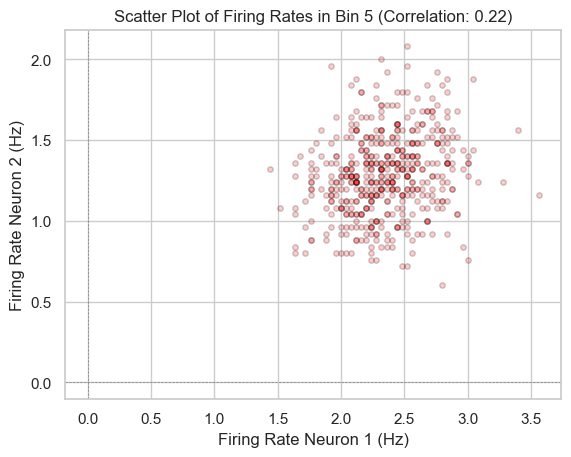

In [ ]:
chosen_bin_index = 5  # Example bin index to plot
bin_center = (loaded_data['stimulus_bins'][chosen_bin_index] + 
            loaded_data['stimulus_bins'][chosen_bin_index + 1]) / 

# Get all neuron 1 firing rates for the chosen bin
firing_rate_neuron_1_bin = loaded_data['firing_rate_neuron_1'][
    (loaded_data['stimulus_bins'][chosen_bin_index] <= s) & 
    (s < loaded_data['stimulus_bins'][chosen_bin_index + 1])
]

# Get all neuron 2 firing rates for the chosen bin
firing_rate_neuron_2_bin = loaded_data['firing_rate_neuron_2'][
    (loaded_data['stimulus_bins'][chosen_bin_index] <= s) & 
    (s < loaded_data['stimulus_bins'][chosen_bin_index + 1])
]

assert len(firing_rate_neuron_1_bin) == len(firing_rate_neuron_2_bin), "The number of firing rates for both neurons in the chosen bin should match"

plt.scatter(firing_rate_neuron_1_bin, firing_rate_neuron_2_bin,
            alpha=0.2, color='red', edgecolor='black', s=15)  

correlation_coefficient = np.corrcoef(firing_rate_neuron_1_bin, firing_rate_neuron_2_bin)[0, 1]
plt.title(f'Scatter Plot of Firing Rates in Bin {chosen_bin_index} (Correlation: {correlation_coefficient:.2f})')
plt.xlabel('Firing Rate Neuron 1 (Hz)')
plt.ylabel('Firing Rate Neuron 2 (Hz)')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.savefig('firing_rate_scatter_plot.png')
plt.show()


c) Scatter plot the simulated tuning curves. Compute and plot the signal correlation. (1 point).

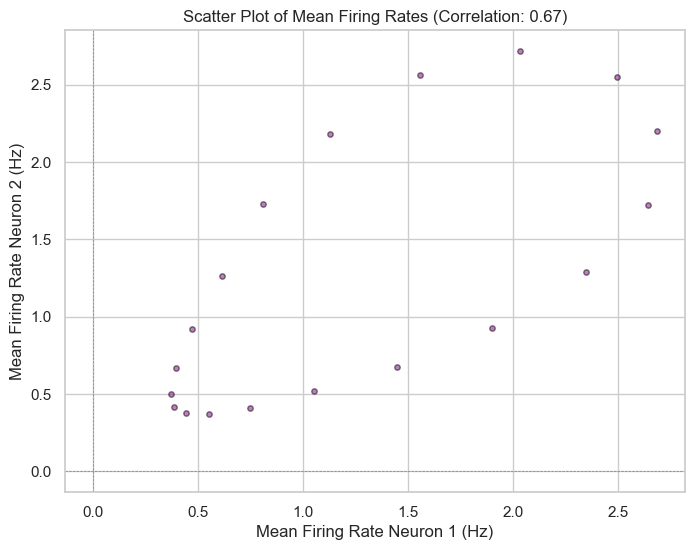

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(mean_firing_rate_neuron_1,
            mean_firing_rate_neuron_2, 
            alpha=0.5, color='purple', edgecolor='black', s=15)
correlation_coefficient = np.corrcoef(mean_firing_rate_neuron_1, mean_firing_rate_neuron_2)[0, 1]
plt.title(f'Scatter Plot of Mean Firing Rates (Correlation: {correlation_coefficient:.2f})')
plt.xlabel('Mean Firing Rate Neuron-1 (Hz)')
plt.ylabel('Mean Firing Rate Neuron-2 (Hz)')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.savefig('mean_firing_rate_scatter_plot.png')
plt.show()

d) Confirm the law of total covariance by computing all of its components (2x2 matrices). (1 point)


In [106]:
rate_covariance = np.cov(observed_firing_rate_neuron_1, observed_firing_rate_neuron_2)
print("Covariance Matrix of Observed Firing Rates:")
print(rate_covariance)

assert  rate_covariance[0, 1] == rate_covariance[1, 0], "Covariance matrix should be symmetric"

num_bins = np.arange(stimulus_bin_size - 1)
stimulus_bins = loaded_data['stimulus_bins']

# Mean Noise Covariance Matrix
covariance_matrices = np.zeros((stimulus_bin_size - 1, 2, 2))
for i in num_bins:
    bin_mask = (s >= stimulus_bins[i]) & (s < stimulus_bins[i + 1])
    if np.any(bin_mask):
        covariance_matrices[i] = np.cov(observed_firing_rate_neuron_1[bin_mask], 
                                         observed_firing_rate_neuron_2[bin_mask])
    else:
        print(f"Bin {i}: No spikes recorded")

mean_noise_covariance_matrix = np.mean(covariance_matrices, axis=0)
print("Mean Covariance Matrix across all bins:")
print(mean_noise_covariance_matrix)

# Mean Signal Covariance Matrix
mean_signal_covariance_matrix = np.cov(mean_firing_rate_neuron_1, mean_firing_rate_neuron_2)
print("Mean Signal Covariance Matrix:")
print(mean_signal_covariance_matrix)

print("sum of Mean Noise and Signal Covariance Matrices:")  
sum_mean_noise_signal = mean_noise_covariance_matrix + mean_signal_covariance_matrix
print(sum_mean_noise_signal)

print("Difference between Rate Covariance and Sum of Mean Noise and Signal Covariance Matrices:")
diff_mean_noise_signal = rate_covariance  - sum_mean_noise_signal
print(diff_mean_noise_signal)
np.linalg.norm(diff_mean_noise_signal, ord='fro')  # Frobenius norm of the difference matrix
print("Frobenius norm of the difference matrix:", 
      np.linalg.norm(diff_mean_noise_signal, ord='fro'))


Covariance Matrix of Observed Firing Rates:
[[0.72803146 0.4577702 ]
 [0.4577702  0.73653186]]
Mean Covariance Matrix across all bins:
[[0.05875363 0.00349645]
 [0.00349645 0.05776404]]
Mean Signal Covariance Matrix:
[[0.71200444 0.47801569]
 [0.47801569 0.7071148 ]]
sum of Mean Noise and Signal Covariance Matrices:
[[0.77075807 0.48151213]
 [0.48151213 0.76487884]]
Difference between Rate Covariance and Sum of Mean Noise and Signal Covariance Matrices:
[[-0.04272661 -0.02374194]
 [-0.02374194 -0.02834698]]
Frobenius norm of the difference matrix: 0.06129007957736788


e) Now, we conduct a different experiment with only 2 stimuli: $s_1 = \frac\pi4$ and $s_2=\frac{\pi}{2}$. Draw 1000 stimuli each and create a scatter plot of the firing rate responses. In the same plot, for each neuron illustrate the covariance (with an ellipse) and the decision boundary (as a line). (2 points)


In [112]:
s_1 = np.ones(1000)*np.pi/4
s_2 = np.ones(1000) * np.pi/2
# Calculate the firing rates for the specific stimulus values
firing_rate_neuron_1_s_1 = np.exp(np.sin(s_1 - np.pi/4))
firing_rate_neuron_1_s_2 = np.exp(np.sin(s_2 - np.pi/4))

firing_rate_neuron_2_s_1 = np.exp(np.sin(s_1 - np.pi/2))
firing_rate_neuron_2_s_2 = np.exp(np.sin(s_2 - np.pi/2))

measured_duration = 25 # in seconds

poisson_spikes_neuron_s_1_n_1 = np.random.poisson(firing_rate_neuron_1_s_1 * measured_duration)
poisson_spikes_neuron_s_2_n_2 = np.random.poisson(firing_rate_neuron_2_s_2 * measured_duration)
poisson_spikes_neuron_s_1_n_2 = np.random.poisson(firing_rate_neuron_2_s_1 * measured_duration)
poisson_spikes_neuron_s_2_n_1 = np.random.poisson(firing_rate_neuron_1_s_2 * measured_duration)

observed_firing_rate_s_1_n_1 = poisson_spikes_neuron_s_1_n_1 / measured_duration
observed_firing_rate_s_2_n_2 = poisson_spikes_neuron_s_2_n_2 / measured_duration    
observed_firing_rate_s_1_n_2 = poisson_spikes_neuron_s_1_n_2 / measured_duration
observed_firing_rate_s_2_n_1 = poisson_spikes_neuron_s_2_n_1 / measured_duration

# Check the number of spikes for each neuron and stimulus
assert len(poisson_spikes_neuron_s_1_n_1) == 1000, "The number of spikes for neuron 1 with stimulus s_1 should match the number of stimuli"




f) Brainstorm at least three biologically plausible ways how noise covariances could appear in our measurements. Discuss whether they can be positive or negative. (1,5 points)

*Hint: You are allowed and encouraged to use the forum for an open exchange among students for this.*

g) Choose one model that allows for positive and (!) negative noise correlations and implement it. Repeat the plot from e) with positive and negative noise correlations (two subplots). Discuss and compute (with MDE) whether the noise correlations support or obstruct decoding. (4 points)

h) Repeat g) for a different set of stimuli that have the opposite (inversed sign) signal correlation. (1 point)